# Load Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold

# Import data

In [44]:
df=pd.read_csv('crime 1.csv')
df=pd.read_csv('crime 1.csv')


In [45]:
df.head(10)

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.022600e+10,2.022600e+16,2999,0,criminal-mischief-other,public-disorder,01-04-2022 11:30,01-04-2022 12:00,01-04-2022 20:36,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,2.022332e+07,2.022330e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 06:45,NaN,01-03-2022 11:01,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,2.022309e+07,2.022310e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 01:00,NaN,01-03-2022 06:11,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,2.022400e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 19:47,NaN,01-03-2022 21:12,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,2.022396e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 17:06,NaN,01-03-2022 20:31,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
5,2.022390e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:40,NaN,01-03-2022 19:07,857 E COLFAX AVE ...,3147195.0,1695029.0,-104.976582,39.740495,6.0,621.0,north-capitol-hill,1,0
6,2.022390e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:19,NaN,01-03-2022 16:21,1501 S COLORADO BLVD ...,3157325.0,1676368.0,-104.940969,39.689101,3.0,312.0,cory-merrill,1,0
7,2.022389e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:15,NaN,01-03-2022 23:05,1133 N LINCOLN ST ...,3144418.0,1692850.0,-104.986500,39.734556,6.0,623.0,capitol-hill,1,0
8,2.022808e+07,2.022810e+13,2999,0,criminal-mischief-other,public-disorder,01-05-2022 19:00,01-06-2022 07:00,01-06-2022 09:03,2500 E CHERRY CREEK S DR ...,3152806.0,1685804.0,-104.956826,39.715080,3.0,311.0,belcaro,1,0
9,2.022456e+07,2.022460e+13,2999,0,criminal-mischief-other,public-disorder,01-04-2022 04:30,01-04-2022 04:40,01-04-2022 05:09,620 N SANTA FE DR ...,3141081.0,1689737.0,-104.998426,39.726062,1.0,123.0,lincoln-park,1,0


In [46]:
df.isnull().sum()

incident_id                    0
offense_id                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      303919
REPORTED_DATE                  0
INCIDENT_ADDRESS           38901
GEO_X                       4179
GEO_Y                       4179
GEO_LON                     4180
GEO_LAT                     4180
DISTRICT_ID                    1
PRECINCT_ID                    1
NEIGHBORHOOD_ID                1
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [47]:
new_df= df.fillna(0)
new_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.022600e+10,2.022600e+16,2999,0,criminal-mischief-other,public-disorder,01-04-2022 11:30,01-04-2022 12:00,01-04-2022 20:36,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,2.022332e+07,2.022330e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 06:45,0,01-03-2022 11:01,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,2.022309e+07,2.022310e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 01:00,0,01-03-2022 06:11,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,2.022400e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 19:47,0,01-03-2022 21:12,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,2.022396e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 17:06,0,01-03-2022 20:31,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486881,2.022211e+09,2.022210e+15,2501,0,forgery-checks,white-collar-crime,4/27/2022 1:00:00 PM,0,4/28/2022 1:34:00 PM,1617 E COLFAX AVE ...,3149527.0,1694928.0,-104.968291,39.740180,6.0,622.0,city-park-west,1,0
486882,2.022211e+09,2.022210e+15,2604,1,fraud-criminal-impersonation,white-collar-crime,6/16/2021 12:00:00 AM,02-03-2022 23:59,4/28/2022 3:10:00 PM,2979 S PONTIAC ST ...,3167278.0,1666422.0,-104.905835,39.661623,3.0,323.0,hampden,1,0
486883,2.022212e+09,2.022210e+15,2605,0,theft-unauth-use-of-ftd,white-collar-crime,4/23/2022 6:30:00 PM,0,4/28/2022 3:56:00 PM,2727 W EVANS AVE ...,3134706.0,1672808.0,-105.021407,39.679682,4.0,422.0,college-view-south-platte,1,0
486884,2.022601e+10,2.022600e+16,2605,0,theft-unauth-use-of-ftd,white-collar-crime,4/27/2022 7:42:00 PM,4/27/2022 7:42:00 PM,4/27/2022 10:28:00 PM,1201 16TH ST ...,3141432.0,1698125.0,-104.997013,39.749083,6.0,612.0,union-station,1,0


# Drop null values

In [48]:
new_df=df.dropna(axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486886 entries, 0 to 486885
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             486886 non-null  float64
 1   offense_id              486886 non-null  float64
 2   OFFENSE_CODE            486886 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  486886 non-null  int64  
 4   OFFENSE_TYPE_ID         486886 non-null  object 
 5   OFFENSE_CATEGORY_ID     486886 non-null  object 
 6   FIRST_OCCURRENCE_DATE   486886 non-null  object 
 7   REPORTED_DATE           486886 non-null  object 
 8   IS_CRIME                486886 non-null  int64  
 9   IS_TRAFFIC              486886 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 37.1+ MB


In [49]:
new_df.head(10)

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,IS_CRIME,IS_TRAFFIC
0,2.022600e+10,2.022600e+16,2999,0,criminal-mischief-other,public-disorder,01-04-2022 11:30,01-04-2022 20:36,1,0
1,2.022332e+07,2.022330e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 06:45,01-03-2022 11:01,1,0
2,2.022309e+07,2.022310e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 01:00,01-03-2022 06:11,1,0
3,2.022400e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 19:47,01-03-2022 21:12,1,0
4,2.022396e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 17:06,01-03-2022 20:31,1,0
5,2.022390e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:40,01-03-2022 19:07,1,0
6,2.022390e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:19,01-03-2022 16:21,1,0
7,2.022389e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:15,01-03-2022 23:05,1,0
8,2.022808e+07,2.022810e+13,2999,0,criminal-mischief-other,public-disorder,01-05-2022 19:00,01-06-2022 09:03,1,0
9,2.022456e+07,2.022460e+13,2999,0,criminal-mischief-other,public-disorder,01-04-2022 04:30,01-04-2022 05:09,1,0


In [50]:
new_df.dtypes

incident_id               float64
offense_id                float64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
REPORTED_DATE              object
IS_CRIME                    int64
IS_TRAFFIC                  int64
dtype: object

# Convert string to float

In [51]:
df['OFFENSE_TYPE_ID']= pd.to_numeric(df['OFFENSE_TYPE_ID'], errors='coerce')
df['OFFENSE_CATEGORY_ID']= pd.to_numeric(df['OFFENSE_CATEGORY_ID'], errors='coerce')
df['FIRST_OCCURRENCE_DATE']= pd.to_numeric(df['FIRST_OCCURRENCE_DATE'], errors='coerce')
df['REPORTED_DATE']= pd.to_numeric(df['REPORTED_DATE'], errors='coerce')

In [52]:
new_df.head(10)

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,IS_CRIME,IS_TRAFFIC
0,2.022600e+10,2.022600e+16,2999,0,criminal-mischief-other,public-disorder,01-04-2022 11:30,01-04-2022 20:36,1,0
1,2.022332e+07,2.022330e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 06:45,01-03-2022 11:01,1,0
2,2.022309e+07,2.022310e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 01:00,01-03-2022 06:11,1,0
3,2.022400e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 19:47,01-03-2022 21:12,1,0
4,2.022396e+07,2.022400e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 17:06,01-03-2022 20:31,1,0
5,2.022390e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:40,01-03-2022 19:07,1,0
6,2.022390e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:19,01-03-2022 16:21,1,0
7,2.022389e+07,2.022390e+13,2999,0,criminal-mischief-other,public-disorder,01-03-2022 16:15,01-03-2022 23:05,1,0
8,2.022808e+07,2.022810e+13,2999,0,criminal-mischief-other,public-disorder,01-05-2022 19:00,01-06-2022 09:03,1,0
9,2.022456e+07,2.022460e+13,2999,0,criminal-mischief-other,public-disorder,01-04-2022 04:30,01-04-2022 05:09,1,0


# Label Encoder

In [53]:
new_df['OFFENSE_CATEGORY_ID'].unique()

array(['public-disorder', 'drug-alcohol', 'sexual-assault',
       'all-other-crimes', 'traffic-accident', 'robbery',
       'other-crimes-against-persons', 'aggravated-assault', 'arson',
       'burglary', 'larceny', 'theft-from-motor-vehicle', 'auto-theft',
       'white-collar-crime', 'murder'], dtype=object)

In [54]:
lbl_encode=LabelEncoder()
new_df['OFFENSE_TYPE_ID']=lbl_encode.fit_transform(new_df['OFFENSE_TYPE_ID'])
new_df['OFFENSE_CATEGORY_ID']=lbl_encode.fit_transform(new_df['OFFENSE_CATEGORY_ID'])
new_df['FIRST_OCCURRENCE_DATE']=lbl_encode.fit_transform(new_df['FIRST_OCCURRENCE_DATE'])
new_df['REPORTED_DATE']=lbl_encode.fit_transform(new_df['REPORTED_DATE'])


C:\Users\malak\AppData\Local\Temp/ipykernel_25020/1852858910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['OFFENSE_TYPE_ID']=lbl_encode.fit_transform(new_df['OFFENSE_TYPE_ID'])
C:\Users\malak\AppData\Local\Temp/ipykernel_25020/1852858910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['OFFENSE_CATEGORY_ID']=lbl_encode.fit_transform(new_df['OFFENSE_CATEGORY_ID'])
C:\Users\malak\AppData\Local\Temp/ipykernel_25020/1852858910.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [55]:
new_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,IS_CRIME,IS_TRAFFIC
0,2.022600e+10,2.022600e+16,2999,0,34,9,3604,4478,1,0
1,2.022332e+07,2.022330e+13,2999,0,34,9,2594,3034,1,0
2,2.022309e+07,2.022310e+13,2999,0,34,9,2569,2993,1,0
3,2.022400e+07,2.022400e+13,2999,0,34,9,2689,3175,1,0
4,2.022396e+07,2.022400e+13,2999,0,34,9,2668,3170,1,0
...,...,...,...,...,...,...,...,...,...,...
486881,2.022211e+09,2.022210e+15,2501,0,74,14,240036,307539,1,0
486882,2.022211e+09,2.022210e+15,2604,1,82,14,261806,307564,1,0
486883,2.022212e+09,2.022210e+15,2605,0,170,14,236128,307574,1,0
486884,2.022601e+10,2.022600e+16,2605,0,170,14,240122,306211,1,0


In [56]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(new_df['OFFENSE_CATEGORY_ID'])

array([ 9,  9,  9, ..., 14, 14, 14], dtype=int64)

In [57]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(new_df['FIRST_OCCURRENCE_DATE'])

array([  3604,   2594,   2569, ..., 236128, 240122, 239058], dtype=int64)

In [58]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(new_df['REPORTED_DATE'])

array([  4478,   3034,   2993, ..., 307574, 306211, 307541], dtype=int64)

In [59]:
new_df.head(10)

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,IS_CRIME,IS_TRAFFIC
0,2.022600e+10,2.022600e+16,2999,0,34,9,3604,4478,1,0
1,2.022332e+07,2.022330e+13,2999,0,34,9,2594,3034,1,0
2,2.022309e+07,2.022310e+13,2999,0,34,9,2569,2993,1,0
3,2.022400e+07,2.022400e+13,2999,0,34,9,2689,3175,1,0
4,2.022396e+07,2.022400e+13,2999,0,34,9,2668,3170,1,0
5,2.022390e+07,2.022390e+13,2999,0,34,9,2664,3156,1,0
6,2.022390e+07,2.022390e+13,2999,0,34,9,2661,3121,1,0
7,2.022389e+07,2.022390e+13,2999,0,34,9,2660,3188,1,0
8,2.022808e+07,2.022810e+13,2999,0,34,9,4569,6658,1,0
9,2.022456e+07,2.022460e+13,2999,0,34,9,3562,4286,1,0


# Test and Split

In [60]:
x=new_df.drop("OFFENSE_CATEGORY_ID",axis=1)
y=new_df["OFFENSE_CATEGORY_ID"]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(len(y_train))
print(len(y_test))


389508
97378


# Decision Tree Classifier

In [62]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

y_pred= dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)


0.8857647517919859

In [63]:
y_pred1= dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)

0.8857647517919859

In [64]:
print('Decision Tree Classifier' + '\n')
print(classification_report(y_test,y_pred1))

print('\n')

print('Confusion matrix')

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2787
           1       1.00      0.95      0.98     15336
           2       0.00      0.00      0.00       157
           3       1.00      0.98      0.99      8637
           4       0.83      1.00      0.91      5033
           5       0.86      0.99      0.92      4703
           6       0.98      0.72      0.83     10211
           7       0.00      0.00      0.00        83
           8       0.45      0.96      0.61      4390
           9       1.00      0.89      0.94     10295
          10       0.00      0.00      0.00      1263
          11       0.00      0.00      0.00       844
          12       0.73      1.00      0.85     10524
          13       1.00      1.00      1.00     21885
          14       0.69      0.26      0.38      1230

    accuracy                           0.89     97378
   macro avg       0.57      0.58      0.56     97378


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


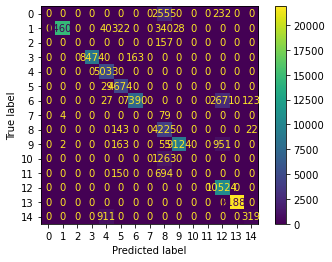

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_clf, x_test, y_test)
plt.show()

In [66]:
#Accuracy= accuracy_score(y_test, y_pred) 
#Kappa= cohen_kappa_score(y_test, y_pred)
#Accuracy, Kappa

In [67]:
#y_pred= dt_clf.predict(x_test)
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred)

# Random Forest Classifier

In [68]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
rf_clf= ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_train, y_train)
y_pred= rf_clf.predict(x_test)
rf_clf.score(x_test, y_test)

0.9999794614800057

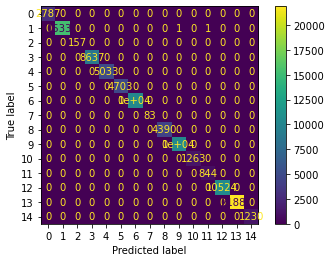

In [69]:
plot_confusion_matrix(rf_clf, x_test, y_test)
plt.show()

In [70]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,y_pred))

print('\n')

print('Confusion matrix')

Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2787
           1       1.00      1.00      1.00     15336
           2       1.00      1.00      1.00       157
           3       1.00      1.00      1.00      8637
           4       1.00      1.00      1.00      5033
           5       1.00      1.00      1.00      4703
           6       1.00      1.00      1.00     10211
           7       1.00      1.00      1.00        83
           8       1.00      1.00      1.00      4390
           9       1.00      1.00      1.00     10295
          10       1.00      1.00      1.00      1263
          11       1.00      1.00      1.00       844
          12       1.00      1.00      1.00     10524
          13       1.00      1.00      1.00     21885
          14       1.00      1.00      1.00      1230

    accuracy                           1.00     97378
   macro avg       1.00      1.00      1.00     97378


# Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train, y_train)
nb_clf.score(x_train, y_train)
y_pred3= nb_clf.predict(x_test)
nb_clf.score(x_test, y_test)

0.1514818542175851

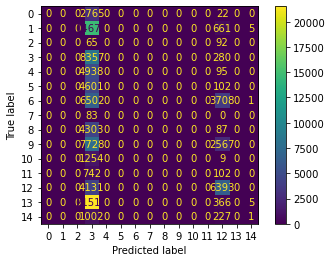

In [79]:
plot_confusion_matrix(nb_clf, x_test, y_test)
plt.show()

In [72]:
print('Naive Bayes Classifier' + '\n')
print(classification_report(y_test,y_pred3))

print('\n')

print('Confusion matrix')

Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2787
           1       0.00      0.00      0.00     15336
           2       0.00      0.00      0.00       157
           3       0.10      0.97      0.18      8637
           4       0.00      0.00      0.00      5033
           5       0.00      0.00      0.00      4703
           6       0.00      0.00      0.00     10211
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00      4390
           9       0.00      0.00      0.00     10295
          10       0.00      0.00      0.00      1263
          11       0.00      0.00      0.00       844
          12       0.43      0.61      0.51     10524
          13       0.00      0.00      0.00     21885
          14       0.08      0.00      0.00      1230

    accuracy                           0.15     97378
   macro avg       0.04      0.11      0.05     97378
we

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Nearest Neighbour Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_train, y_train)
y_pred4= knn_clf.predict(x_test)
knn_clf.score(x_test, y_test)

0.5825648503768819

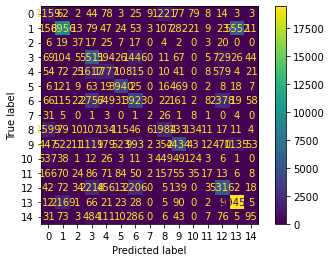

In [74]:
plot_confusion_matrix(knn_clf, x_test, y_test)
plt.show()

In [75]:
print('K-Nearest Neighbour Classifier' + '\n')
print(classification_report(y_test,y_pred4))

print('\n')

print('Confusion matrix')

K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0       0.26      0.42      0.32      2787
           1       0.72      0.58      0.64     15336
           2       0.19      0.24      0.21       157
           3       0.39      0.64      0.48      8637
           4       0.42      0.35      0.39      5033
           5       0.82      0.84      0.83      4703
           6       0.40      0.38      0.39     10211
           7       0.07      0.02      0.04        83
           8       0.45      0.45      0.45      4390
           9       0.73      0.43      0.54     10295
          10       0.28      0.10      0.15      1263
          11       0.17      0.02      0.04       844
          12       0.55      0.51      0.53     10524
          13       0.74      0.89      0.81     21885
          14       0.29      0.08      0.12      1230

    accuracy                           0.58     97378
   macro avg       0.43      0.40      0.40     

# Logistic Regression Classifier

In [76]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_train, y_train)
y_pred5= lr_clf.predict(x_test)
lr_clf.score(x_test, y_test)

0.10807369220973936

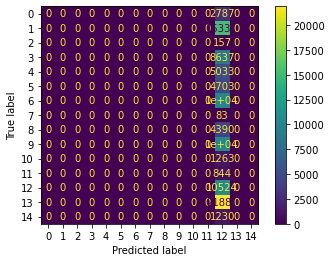

In [77]:
plot_confusion_matrix(lr_clf, x_test, y_test)
plt.show()

In [78]:
print('Logistic Regression Classifier' + '\n')
print(classification_report(y_test,y_pred5))

print('\n')

print('Confusion matrix')

Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2787
           1       0.00      0.00      0.00     15336
           2       0.00      0.00      0.00       157
           3       0.00      0.00      0.00      8637
           4       0.00      0.00      0.00      5033
           5       0.00      0.00      0.00      4703
           6       0.00      0.00      0.00     10211
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00      4390
           9       0.00      0.00      0.00     10295
          10       0.00      0.00      0.00      1263
          11       0.00      0.00      0.00       844
          12       0.11      1.00      0.20     10524
          13       0.00      0.00      0.00     21885
          14       0.00      0.00      0.00      1230

    accuracy                           0.11     97378
   macro avg       0.01      0.07      0.01     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
